# Wstęp do Sztucznej Inteligencji - rok akademicki 2018/2019

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Temat: Algorytmy genetyczne - Lab 3 - Zadania (obowiązkowe)
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Zadanie 1 (1pkt.)

Zgodnie z instrukcjami prowadzącego, wybierz funkcję testową ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima" (z wyjątkiem funkcji nr 6).

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

In [1]:
import math
import numpy as np

print(125701%16+1)
# testowa funkcja celu
# x - jednowymiarowa tablica ndarray
def obj_func(x):
    N = 2
    sum = 0
    prod = 1
    i = 1
    for xi in x:
        sum += (xi * xi)/4000
        prod *= np.cos(xi / (np.sqrt(i)))
        i += 1

    fx = sum - prod + 1
    return fx

6


## Zadanie 2 (1pkt.)

Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

<IPython.core.display.Javascript object>


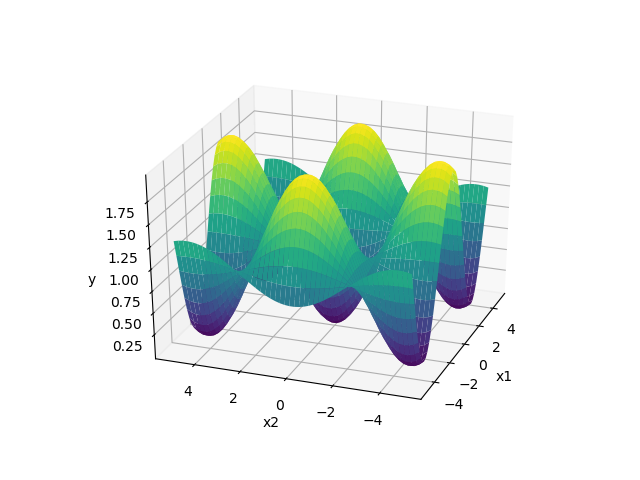

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

 # przygotowanie siatki
sampled = np.linspace(-5, 5, 50)
sampled2 = np.linspace(-5, 5, 50)
x, y = np.meshgrid(sampled, sampled2)
z = np.zeros((len(sampled), len(sampled2)))

for i in range(len(sampled)):
    for j in range(len(sampled2)):
        inputs = {'x1': x[i, j], 'x2': y[i, j]}
        #res = mamdani.compute(inputs)
        z[i, j] = obj_func((x[i, j], y[i, j]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
#cset = ax.contourf(x, y, z, zdir='z', offset=-1, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30, 200)

## Zadanie 3 (2pkt.)

Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

In [3]:
import numpy as np


def nbits(a, b, dx):
    dl = b-a
    il_krokow = dl/dx
    il_bitow = wielkosc(il_krokow)[1]
    il_n_krokow = wielkosc(il_krokow)[0]
    B = il_bitow
    dx_new = dl/il_n_krokow
    return B, dx_new


def wielkosc(liczba):
    i = 1
    l = 0
    while(liczba>i):
        i*=2
        l+=1

    return (i,l)


def gen_population(P, N, B):
    array = np.ndarray(shape=(P, N * B), dtype="int")
    for i in range(P):
        for j in range(N*B):
            array[i][j] = np.random.randint(2)
    return array


def decode_individual(individual, N, B, a, dx):
    array = np.ndarray(shape=(N), dtype="float")
    for i in range(N):
        sum = 0
        for j in range(B):
            sum += individual[i * B + j] * (2 ** j)
        array[i] = a + (sum * dx)
    return array


def evaluate_population(func, pop, N, B, a, dx):
    evaluated_pop = np.ndarray(shape=(len(pop)), dtype="float")
    for i in range(len(pop)):
        arr = decode_individual(pop[i], N, B, a, dx)
        value1 = arr[0]
        value2 = arr[1]
        evaluated_pop[i] = func((value1, value2))
    return evaluated_pop


def get_best(pop, evaluated_pop):
    best_individual = pop[0]
    best_value = evaluated_pop[0]
    for i in range(len(evaluated_pop)):
        if evaluated_pop[i] > best_value:
            best_value = evaluated_pop[i]
            best_individual = pop[i]
    return best_individual, best_value


def roulette(pop, evaluated_pop):
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    new_evpop = np.ndarray(shape=(len(evaluated_pop)), dtype="float")

    #szukam min < 0
    min = 1
    for i in range(len(evaluated_pop)):
        if(evaluated_pop[i]<min):
            min = evaluated_pop[i]

    #obliczam sume ocen
    sum = 0
    for i in range(len(evaluated_pop)):
        new_evpop[i] = evaluated_pop[i] - min + 1
        sum += new_evpop[i]

    #tworze tablice prawdopodobienstw
    probability_array = np.ndarray(shape=(len(evaluated_pop)), dtype="float")
    for i in range(len(evaluated_pop)):
        if(i > 0):
            #print(1, " - ", new_evpop[i] / sum)
            probability_array[i] = new_evpop[i] / sum + probability_array[i-1]

        else:
            #print(0, " - ", new_evpop[i] / sum)
            probability_array[i] = new_evpop[i] / sum

    #print(probability_array)
    #ruletka
    for i in range(len(evaluated_pop)):
        random = np.random.random()
        for j in range(len(probability_array)):
            if(probability_array[j]>=random):
                new_pop[i] = pop[j]
                break
    return new_pop


def cross(pop, pk):
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    #print("Population size ", len(pop))
    for i in range(0, len(pop)-1, 2):
        if(np.random.random() < pk):
            #losowy punkt krzyzowania
            rand_point = np.random.randint(0, len(pop[0]))
            #print("Cross point: ", rand_point)

            #krzyzowanie
            for j in range(rand_point):
                new_pop[i][j] = pop[i][j]
                new_pop[i+1][j] = pop[i+1][j]
            for k in range(rand_point, len(pop[0])):
                new_pop[i][k] = pop[i+1][k]
                new_pop[i+1][k] = pop[i][k]

        else:
            new_pop[i] = pop[i]
            new_pop[i+1] = pop[i+1]
        if len(pop) % 2 == 1:
            new_pop[len(pop) - 1] = pop[len(pop) - 1]
    return new_pop


def mutate(pop, pm):
    new_pop = np.ndarray(shape=(len(pop), len(pop[0])), dtype="int")
    for i in range(len(pop)):
        for j in range(len(pop[i])):
            if(np.random.random() <= pm):
                new_pop[i][j] = np.abs(pop[i][j] - 1)
            else:
                new_pop[i][j] = pop[i][j]

    return new_pop


#Funkcja nr. 7
def obj_func(x):
    N = 2
    sum = 0
    prod = 1
    i = 1
    for xi in x:
        sum += (xi * xi)/4000
        prod *= np.cos(xi / (np.sqrt(i)))
        i += 1

    fx = sum - prod + 1
    return fx

#% matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


def show_diagram():
    # przygotowanie siatki
    sampled = np.linspace(-5, 5, 20)
    sampled2 = np.linspace(-5, 5, 20)
    x, y = np.meshgrid(sampled, sampled2)
    z = np.zeros((len(sampled), len(sampled2)))

    for i in range(len(sampled)):
        for j in range(len(sampled2)):
            inputs = {'x1': x[i, j], 'x2': y[i, j]}
            #res = mamdani.compute(inputs)
            z[i, j] = obj_func((x[i, j], y[i, j]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
    #cset = ax.contourf(x, y, z, zdir='z', offset=-1, cmap='viridis', alpha=0.5)
    #cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.5)
    #cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.5)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.view_init(30, 200)


def show_3D_diagram(array2d_1, array_1, array2d_2, array_2, array2d_3, array_3, showm):
    # przygotowanie siatki
    sampled = np.linspace(-5, 5, 20)
    sampled2 = np.linspace(-5, 5, 20)
    x, y = np.meshgrid(sampled, sampled2)
    z = np.zeros((len(sampled), len(sampled2)))

    for i in range(len(sampled)):
        for j in range(len(sampled2)):
            inputs = {'x1': x[i, j], 'x2': y[i, j]}
            # res = mamdani.compute(inputs)
            z[i, j] = obj_func((x[i, j], y[i, j]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if(showm):
        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', alpha=0.5, linewidth=0.4, antialiased=True)
    #cset = ax.contourf(x, y, z, zdir='z', offset=-1, cmap='viridis', alpha=0.1)
    #cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.1)
    #cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.1)


    ax.scatter(array2d_1[0], array2d_1[1], array_1, "r")
    print("First: ", array2d_1[0], array2d_1[1], array_1,)
    ax.scatter(array2d_2[0], array2d_2[1], array_2, "g")
    ax.scatter(array2d_3[0], array2d_3[1], array_3, "b")

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Value')

    plt.show()


def show_2D_diagram(list_best, list_best_generation, list_mean):
    t1 = np.arange(0, len(list_best), 1)

    plt.figure(1)
    plt.subplot(111)
    line1, = plt.plot(t1, list_best, 'r-')
    line2, = plt.plot(t1, list_best_generation, 'g-')
    line3, = plt.plot(t1, list_mean, 'b-')

    plt.legend((line1, line2, line3), ('list_best', 'list_best_generation', 'list_mean'))

    plt.show()


first_gen, mid_gen, last_gen = None, None, None
first_gen_p, mid_gen_p, last_gen_p = None, None, None
#show_diagram()
def main(fun, pop_size, pk, pm, generations, dx):
    #Generowanie populacji poczatkowej
    start, end = -5, 5
    bits, ndx = nbits(start, end, dx)
    #print("Zakres kodowania od: ", start, " do: ", end, " z krokiem: ", ndx)
    ch_pop = 2
    #print("Generuje populacje ", pop_size, " osobnikow o ", ch_pop, " cechach ", bits, " bitowych:...")
    pop = gen_population(pop_size, ch_pop, bits)
    #print(pop)
    #print("Wartosci oceny osobnikow przed:")
    #for i in range(pop_size):
    #    print(fun(decode_individual(pop[i], ch_pop, bits, start, ndx)))


    new_pop = pop

    max = 0
    best_sol = np.ndarray(shape=(bits), dtype="int")
    best_generation = 0
    list_best = np.ndarray(shape=(generations), dtype="float")
    list_best_generation = np.ndarray(shape=(generations), dtype="float")
    list_mean = np.ndarray(shape=(generations), dtype="float")
    for i in range(generations):
        #ocena osobnikow
        evaluated_pop = evaluate_population(fun, new_pop, ch_pop, bits, start, ndx)
        ###pobranie wartosci z tresci zadania###
        if i == 0:
            #print("test")
            first_gen = np.ndarray(shape=(2, len(new_pop)), dtype="float")
            for j in range(len(new_pop)):
                arr = decode_individual(new_pop[j], ch_pop, bits, start, ndx)
                first_gen[0][j] = arr[0]
                first_gen[1][j] = arr[1]
            first_gen_p = evaluated_pop
            #print(first_gen)
        elif i == generations/2:
            mid_gen = np.ndarray(shape=(2, len(new_pop)), dtype="float")
            for j in range(len(new_pop)):
                arr = decode_individual(new_pop[j], ch_pop, bits, start, ndx)
                mid_gen[0][j] = arr[0]
                mid_gen[1][j] = arr[1]
            mid_gen_p = evaluated_pop
        elif i == generations-1:
            last_gen = np.ndarray(shape=(2, len(new_pop)), dtype="float")
            for j in range(len(new_pop)):
                arr = decode_individual(new_pop[j], ch_pop, bits, start, ndx)
                last_gen[0][j] = arr[0]
                last_gen[1][j] = arr[1]
            last_gen_p = evaluated_pop
        ######
        #max w pokoleniu
        list_best_generation[i] = get_best(new_pop, evaluated_pop)[1]
        #sprawdzenie czy jest max w wszystkich generacjach
        if get_best(new_pop, evaluated_pop)[1] > max:
            max = get_best(new_pop, evaluated_pop)[1]
            best_sol = get_best(new_pop, evaluated_pop)[0]
            best_generation = i

        list_best[i] = list_best_generation[best_generation]
        list_mean[i] = np.average(evaluated_pop)

        if(i<generations-1):
            #generowanie populacji potomnej
            new_pop = roulette(new_pop, evaluated_pop)
            new_pop = cross(new_pop, pk)
            new_pop = mutate(new_pop, pm)

    #print("Wartosci oceny osobnikow po:")
    #for i in range(pop_size):
    #    print(fun(decode_individual(new_pop[i], ch_pop, bits, start, ndx)))
    return best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p



#best_sol, best_generation, list_best, list_best_generation, list_mean = main(obj_func, 20, 0.7, 0.02, 50, 0.1)

#print("best sol: ", best_sol)
#print("best_generation: ", best_generation)
#print("list_best: ", list_best)
#print("list_best_generation: ", list_best_generation)
#print("list_mean: ", list_mean)

In [4]:
best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, 50, 0.7, 0.02, 100, 0.1)
print("best sol: ", best_sol)
print("best_generation: ", best_generation)
print("list_best: ", list_best)
print("list_best_generation: ", list_best_generation)
print("list_mean: ", list_mean)

best sol:  [0 0 0 0 0 0 1 1 1 1 0 0 0 0]
best_generation:  16
list_best:  [1.96444206 1.96444206 1.96444206 2.00188276 2.00188276 2.00188276
 2.00188276 2.00188276 2.00188276 2.00188276 2.00188276 2.00188276
 2.00188276 2.00188276 2.00188276 2.00188276 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136
 2.00493136 2.00493136 2.00493136 2.00493136 2.00493136

## Zadnie 4 (1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

<IPython.core.display.Javascript object>


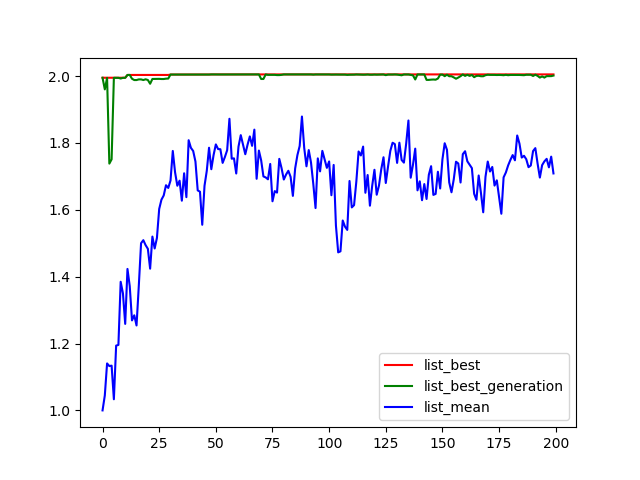

<IPython.core.display.Javascript object>


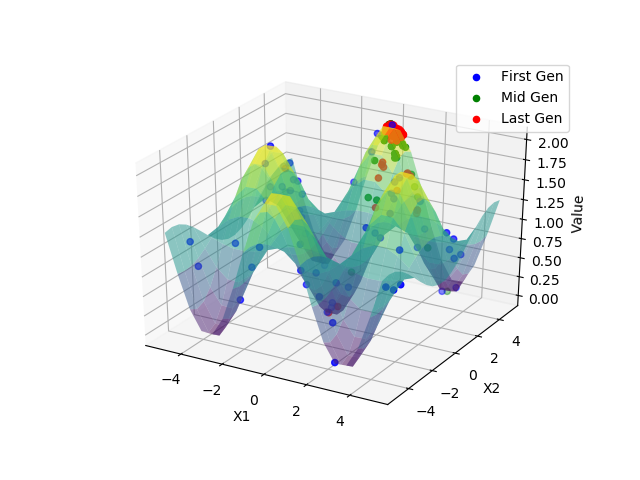

First:  [0.05619313 1.24987977 1.42654061 0.66485175 0.00956316 0.97893507
 0.76568315 1.80019388 0.71470876 0.80836309 0.46836184 1.63439279
 1.35539672 1.61499679 0.10334903 1.00964852 0.98274088 0.74525921
 0.11519155 1.74481844 1.16948518 0.9838477  1.22917156 1.53638983
 1.96004448 1.9870548  0.73076716 1.92075279 0.50480879 0.89852982
 1.28063662 1.4833984  0.58006499 1.64350433 0.3821089  0.74380088
 0.85639944 1.09476206 1.44812328 0.2909504  1.0356311  1.48830422
 0.06836351 1.11236483 1.56735513 1.1239876  1.69973592 0.90428408
 0.9649022  0.49397191 0.81961551 1.02646784 0.7591529  0.77467165
 0.04164649 1.9949258  1.27104009 1.24119638 0.48591902 0.15637703]
Mid:  [2.00444791 1.74600115 1.70818339 1.79914726 2.00327077 1.25122086
 2.00421004 2.00416443 1.9162177  2.00475357 1.16295802 2.00364236
 1.8899903  1.72965966 1.99736947 1.91695557 0.95977697 1.99768464
 2.00420985 1.87591406 1.70926785 1.8130539  1.99736999 1.7296629
 1.91622062 1.89000404 1.70706308 2.00424407 1.2

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


def show_3D_diagram(array2d_1, array_1, array2d_2, array_2, array2d_3, array_3, showm):
    # przygotowanie siatki
    sampled = np.linspace(-5, 5, 20)
    sampled2 = np.linspace(-5, 5, 20)
    x, y = np.meshgrid(sampled, sampled2)
    z = np.zeros((len(sampled), len(sampled2)))

    for i in range(len(sampled)):
        for j in range(len(sampled2)):
            inputs = {'x1': x[i, j], 'x2': y[i, j]}
            # res = mamdani.compute(inputs)
            z[i, j] = obj_func((x[i, j], y[i, j]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if(showm):
        surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', alpha=0.5, linewidth=0.4, antialiased=True)
    #cset = ax.contourf(x, y, z, zdir='z', offset=-1, cmap='viridis', alpha=0.1)
    #cset = ax.contourf(x, y, z, zdir='x', offset=11, cmap='viridis', alpha=0.1)
    #cset = ax.contourf(x, y, z, zdir='y', offset=11, cmap='viridis', alpha=0.1)


    ax.scatter(array2d_1[0], array2d_1[1], array_1, label='First Gen', c="b")
    print("First: ", array_1)
    print("Mid: ", array_2)
    print("Last: ", array_3)
    ax.scatter(array2d_2[0], array2d_2[1], array_2, label='Mid Gen', c="g")
    ax.scatter(array2d_3[0], array2d_3[1], array_3, label='Last Gen', c="r")

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Value')
    ax.legend()
    plt.show()


def show_2D_diagram(list_best, list_best_generation, list_mean):
    t1 = np.arange(0, len(list_best), 1)

    plt.figure(1)
    plt.subplot(111)
    line1, = plt.plot(t1, list_best, 'r-')
    line2, = plt.plot(t1, list_best_generation, 'g-')
    line3, = plt.plot(t1, list_mean, 'b-')

    plt.legend((line1, line2, line3), ('list_best', 'list_best_generation', 'list_mean'))

    plt.show()

best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, 60, 0.7, 0.01, 200, 1e-10)
show_2D_diagram(list_best, list_best_generation, list_mean)
show_3D_diagram(first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p, True)

## Zadanie 5 (5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

In [6]:
#przygotuj wartości parametrów AG
exec_num = 20 # lub więcej

def Zad1():
    pop_size= 60
    pk= 0.7
    pm= 0.01
    generations= 200
    dx= 1e-10
    print("<<Zadanie 1>>")
    najlepsze = np.ndarray(shape=(exec_num), dtype="float")
    nrpokolenia = np.ndarray(shape=(exec_num), dtype="int")
    odchylenia = np.ndarray(shape=(exec_num), dtype="float")

    for i in range(exec_num):
        #uruchom AG
        #print("Test nr ", i+1)
        best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, pop_size, pk, pm, generations, dx)
        #zapamiętaj wyniki
        najlepsze[i] = list_best[len(list_best)-1]
        nrpokolenia[i] = best_generation
        odchylenia[i] = np.std(list_best_generation)

    #wylicz średnią i odchylenie standardowe
    print("Srednia z max: ", np.average(najlepsze))
    print("Srednia z nr pokolen: ", np.average(nrpokolenia))
    print("Srednia z odchylen standardowych: ", np.average(odchylenia))

def Zad2():
    pop_size= 60
    pk= 0.7
    pm= 0.01
    generations= 100
    dx= 1e-10
    print("<<Zadanie 2>>")
    najlepsze = np.ndarray(shape=(exec_num), dtype="float")
    nrpokolenia = np.ndarray(shape=(exec_num), dtype="int")
    odchylenia = np.ndarray(shape=(exec_num), dtype="float")
    
    for j in range(5):
        print("Test dla ", generations, " generacji:")
        for i in range(exec_num):
            #uruchom AG
            #print("Test nr ", i+1)
            best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, pop_size, pk, pm, generations, dx)
            #zapamiętaj wyniki
            najlepsze[i] = list_best[len(list_best)-1]
            nrpokolenia[i] = best_generation
            odchylenia[i] = np.std(list_best_generation)

        #wylicz średnią i odchylenie standardowe
        print("Srednia z max: ", np.average(najlepsze))
        print("Srednia z nr pokolen: ", np.average(nrpokolenia))
        print("Srednia z odchylen standardowych: ", np.average(odchylenia))
        generations+=200

def Zad3():
    pop_size= 60
    pk= 0.7
    pm= 0
    generations= 200
    dx= 1e-10
    print("<<Zadanie 3>>")
    najlepsze = np.ndarray(shape=(exec_num), dtype="float")
    nrpokolenia = np.ndarray(shape=(exec_num), dtype="int")
    odchylenia = np.ndarray(shape=(exec_num), dtype="float")
    
    for i in range(exec_num):
        #uruchom AG
        #print("Test nr ", i+1)
        best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, pop_size, pk, pm, generations, dx)
        #zapamiętaj wyniki
        najlepsze[i] = list_best[len(list_best)-1]
        nrpokolenia[i] = best_generation
        odchylenia[i] = np.std(list_best_generation)

    #wylicz średnią i odchylenie standardowe
    print("Srednia z max: ", np.average(najlepsze))
    print("Srednia z nr pokolen: ", np.average(nrpokolenia))
    print("Srednia z odchylen standardowych: ", np.average(odchylenia))

def Zad4():
    pop_size= 60
    pk= 0.0
    pm= 0.01
    generations= 200
    dx= 1e-10
    print("<<Zadanie 4>>")
    najlepsze = np.ndarray(shape=(exec_num), dtype="float")
    nrpokolenia = np.ndarray(shape=(exec_num), dtype="int")
    odchylenia = np.ndarray(shape=(exec_num), dtype="float")
    
    for i in range(exec_num):
        #uruchom AG
        #print("Test nr ", i+1)
        best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, pop_size, pk, pm, generations, dx)
        #zapamiętaj wyniki
        najlepsze[i] = list_best[len(list_best)-1]
        nrpokolenia[i] = best_generation
        odchylenia[i] = np.std(list_best_generation)

    #wylicz średnią i odchylenie standardowe
    print("Srednia z max: ", np.average(najlepsze))
    print("Srednia z nr pokolen: ", np.average(nrpokolenia))
    print("Srednia z odchylen standardowych: ", np.average(odchylenia))
    
    
def Zad5():
    pop_size= 20
    pk= 0.7
    pm= 0.01
    generations= 100
    dx= 1e-10
    print("<<Zadanie 5>>")
    najlepsze = np.ndarray(shape=(exec_num), dtype="float")
    nrpokolenia = np.ndarray(shape=(exec_num), dtype="int")
    odchylenia = np.ndarray(shape=(exec_num), dtype="float")
    #porównaj dwa ustawienia: pop_size=20, generations=100 vs. pop_size=100, generations=20
    for j in range(2):
        print("Test dla pop_size=", pop_size, " i generations=",generations)
        for i in range(exec_num):
            #uruchom AG
            #print("Test nr ", i+1)
            best_sol, best_generation, list_best, list_best_generation, list_mean, first_gen, first_gen_p, mid_gen, mid_gen_p, last_gen, last_gen_p = main(obj_func, pop_size, pk, pm, generations, dx)
            #odchylenie standardowe
            #suma = 0
            #odchylenie = 0
            #for k in range(len(list_best_generation)):
            #    suma+=(np.average(list_best_generation)-list_best_generation[k])**2
            #print(suma)
            #odchylenie = math.sqrt(suma/len(list_best_generation))
            
            #zapamiętaj wyniki
            najlepsze[i] = list_best[len(list_best)-1]
            nrpokolenia[i] = best_generation
            odchylenia[i] = np.std(list_best_generation)

        #wylicz średnią i odchylenie standardowe
        print("Srednia z max: ", np.average(najlepsze))
        print("Srednia z nr pokolen: ", np.average(nrpokolenia))
        print("Srednia z odchylen standardowych: ", np.average(odchylenia))
        pop_size= 100
        generations= 20
        
Zad1()
Zad2()
Zad3()
Zad4()
Zad5()

<<Zadanie 1>>
Srednia z max:  2.003367850658976
Srednia z nr pokolen:  97.3
Srednia z odchylen standardowych:  0.021623682351313858
<<Zadanie 2>>
Test dla  100  generacji:
Srednia z max:  2.0023434215726352
Srednia z nr pokolen:  53.2
Srednia z odchylen standardowych:  0.02430468726316535
Test dla  300  generacji:
Srednia z max:  2.003104818305063
Srednia z nr pokolen:  157.2
Srednia z odchylen standardowych:  0.016104909995082357
Test dla  500  generacji:
Srednia z max:  2.00354488304082
Srednia z nr pokolen:  242.9
Srednia z odchylen standardowych:  0.013985175922367884
Test dla  700  generacji:
Srednia z max:  2.0032968241864935
Srednia z nr pokolen:  258.8
Srednia z odchylen standardowych:  0.01283170892194833
Test dla  900  generacji:
Srednia z max:  2.003634918452382
Srednia z nr pokolen:  369.75
Srednia z odchylen standardowych:  0.012500005105632293
<<Zadanie 3>>
Srednia z max:  1.995641732085343
Srednia z nr pokolen:  22.9
Srednia z odchylen standardowych:  0.02133056474388508

UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>